In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from shapely.geometry import Point

Load data to the pandas data frame

In [2]:
df = pd.read_csv("Murder _Motives.csv")

In [3]:
df.head()

,STATE,YEAR,Gain,Property Dispute,Personal Vendetta or Enemity,Love Affairs/ Sexual relations,Dowry,Lunacy,Witchcraft,Communalism,Casteism,Class Conflict,Political Reasons,Terrorists/ Extremists,Other Causes,Total
0,ANDHRA PRADESH,2001,122,159,332,355,96,7,20,1,1,2,39,120,1348,2602
1,ARUNACHAL PRADESH,2001,8,2,16,5,0,0,0,0,0,0,0,4,48,83
2,ASSAM,2001,94,125,83,37,62,1,3,0,1,25,2,111,812,1356
3,BIHAR,2001,310,888,579,178,288,4,1,0,27,6,47,22,1293,3643
4,CHHATTISGARH,2001,25,81,129,75,21,21,14,0,1,0,0,57,456,880


In [4]:
df.shape

(494, 16)

In [5]:
df.isnull().sum()

STATE                             0
YEAR                              0
Gain                              0
Property Dispute                  0
Personal Vendetta or Enemity      0
Love Affairs/ Sexual relations    0
Dowry                             0
Lunacy                            0
Witchcraft                        0
Communalism                       0
Casteism                          0
Class Conflict                    0
Political Reasons                 0
Terrorists/ Extremists            0
Other Causes                      0
Total                             0
dtype: int64

In [6]:
df.describe()

,YEAR,Gain,Property Dispute,Personal Vendetta or Enemity,Love Affairs/ Sexual relations,Dowry,Lunacy,Witchcraft,Communalism,Casteism,Class Conflict,Political Reasons,Terrorists/ Extremists,Other Causes,Total
count,494.00000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,2007.00000,129.188259,236.878543,305.253036,196.074899,89.647773,4.087045,12.965587,4.421053,3.546559,4.020243,11.502024,62.836032,1585.797571,2646.218623
std,3.74545,358.749138,666.006403,851.530246,542.718187,256.073181,12.384088,37.925528,24.867047,11.078407,13.466493,33.729971,214.748344,4395.113425,7312.177259
min,2001.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.00000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,65.500000
50%,2007.00000,23.000000,29.000000,66.500000,30.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,321.000000,586.500000
75%,2010.00000,73.750000,132.000000,177.000000,119.500000,51.000000,2.000000,4.000000,0.000000,1.000000,0.000000,4.000000,19.000000,1030.750000,1599.250000
max,2013.00000,1838.000000,3337.000000,4870.000000,2688.000000,1458.000000,96.000000,240.000000,308.000000,77.000000,88.000000,200.000000,1555.000000,20986.000000,36202.000000


In [7]:
df.columns

Index(['STATE', 'YEAR', 'Gain', 'Property Dispute',
       'Personal Vendetta or Enemity', 'Love Affairs/ Sexual relations',
       'Dowry', 'Lunacy', 'Witchcraft', 'Communalism', 'Casteism',
       'Class Conflict', 'Political Reasons', 'Terrorists/ Extremists',
       'Other Causes', 'Total'],
      dtype='object')

Conver the columns to lower case 

In [8]:
df.columns = df.columns.str.lower()

In [9]:
df.columns

Index(['state', 'year', 'gain', 'property dispute',
       'personal vendetta or enemity', 'love affairs/ sexual relations',
       'dowry', 'lunacy', 'witchcraft', 'communalism', 'casteism',
       'class conflict', 'political reasons', 'terrorists/ extremists',
       'other causes', 'total'],
      dtype='object')

India' Murder data year wise

<Axes: title={'center': 'number of murders in india over the years'}, xlabel='year'>

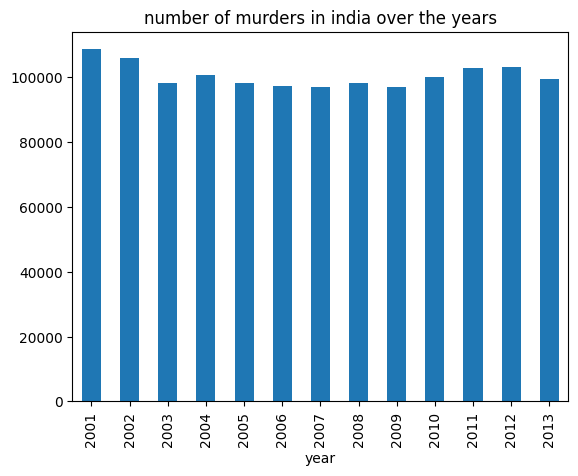

In [10]:
df.groupby(['year'])['total'].sum().plot(kind='bar',title="number of murders in india over the years")

In [11]:
motives = df.groupby(['year']).sum().reset_index()

Catagory wise Murders in india 

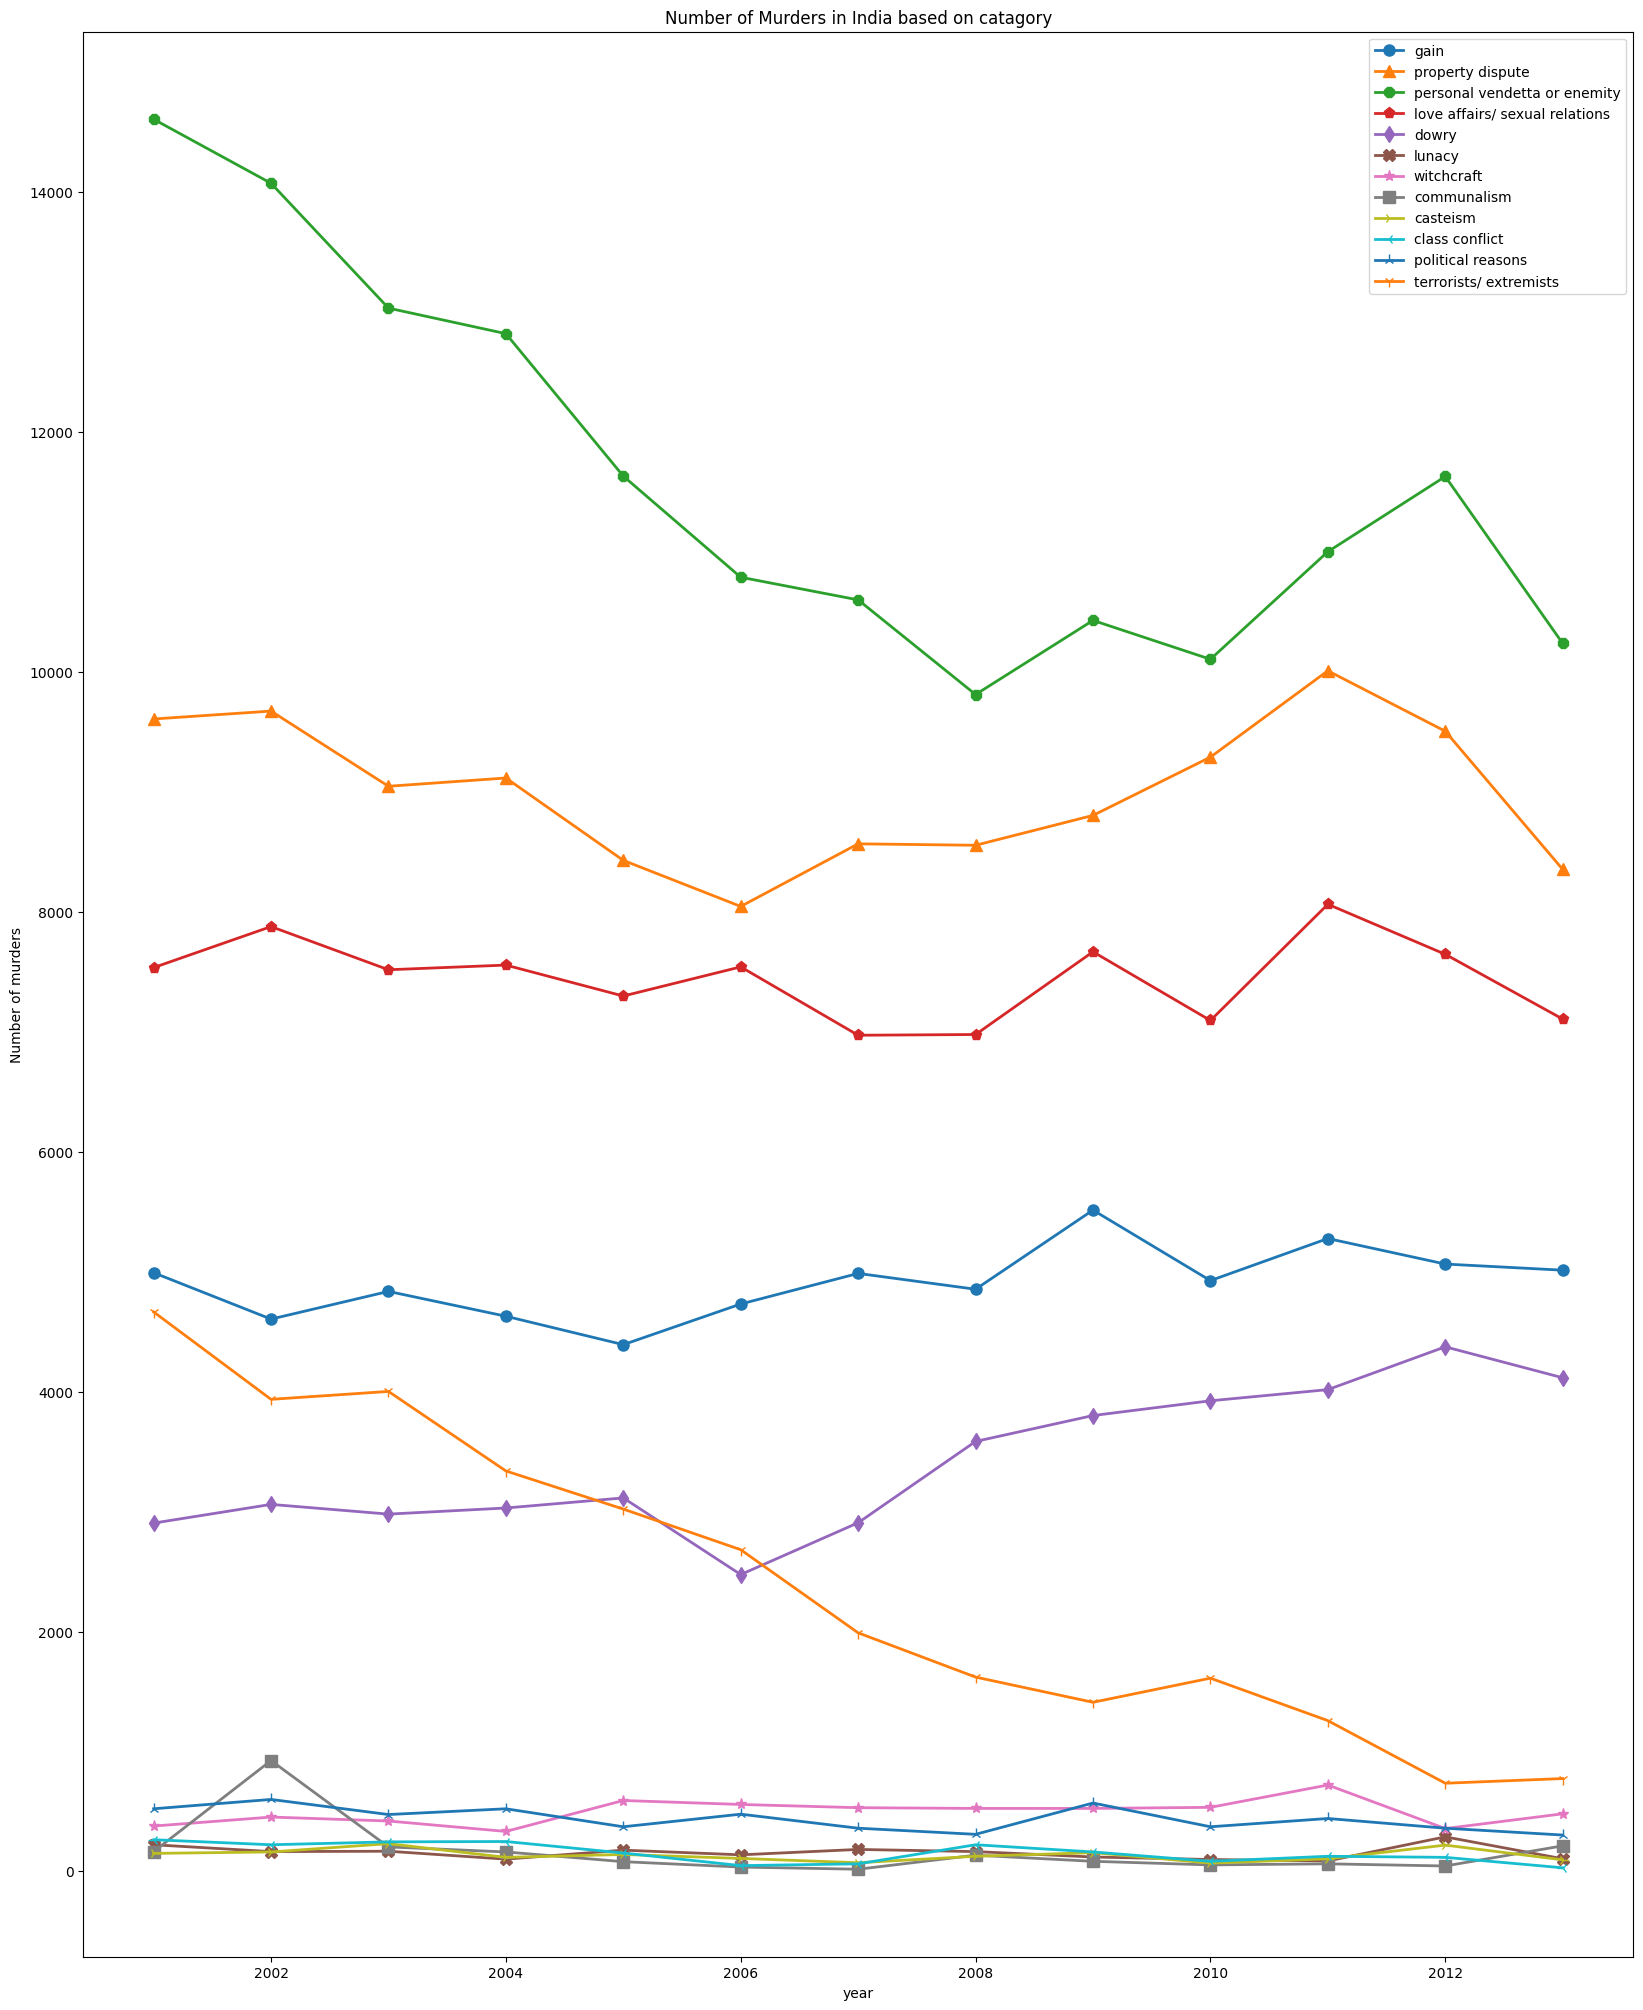

In [12]:
fig, ax=plt.subplots(figsize=(20,25))
plt.plot(motives['year'],motives['gain'],label="gain",linewidth=2,markersize=8,marker="o")
plt.plot(motives['year'],motives['property dispute'],label="property dispute",linewidth=2,markersize=8,marker="^")
plt.plot(motives['year'],motives['personal vendetta or enemity'],label="personal vendetta or enemity",linewidth=2,markersize=8,marker="8")
plt.plot(motives['year'],motives['love affairs/ sexual relations'],label="love affairs/ sexual relations",linewidth=2,markersize=8,marker="p")
plt.plot(motives['year'],motives['dowry'],label="dowry",linewidth=2,markersize=8,marker="d")
plt.plot(motives['year'],motives['lunacy'],label="lunacy",linewidth=2,markersize=8,marker="X")
plt.plot(motives['year'],motives['witchcraft'],label="witchcraft",linewidth=2,markersize=8,marker="*")
plt.plot(motives['year'],motives['communalism'],label="communalism",linewidth=2,markersize=8,marker="s")
plt.plot(motives['year'],motives['casteism'],label="casteism",linewidth=2,markersize=8,marker="4")
plt.plot(motives['year'],motives['class conflict'],label="class conflict",linewidth=2,markersize=8,marker="3")
plt.plot(motives['year'],motives['political reasons'],label="political reasons",linewidth=2,markersize=8,marker="2")
plt.plot(motives['year'],motives['terrorists/ extremists'],label="terrorists/ extremists",linewidth=2,markersize=8,marker="1")
ax.legend()
ax.set_xlabel("year")
ax.set_ylabel("Number of murders")
plt.title("Number of Murders in India based on catagory")
fig.show()

In [13]:
top= df.groupby(['state'])['total'].sum().reset_index()
top.sort_values(by='total',ascending=False,inplace=True)


In [14]:
top['state'] = top['state'].str.lower()
top = top.drop_duplicates(subset=['state'])
top= top.drop(61)
top=top.drop(62)
top =top.drop(63)
top = top.drop(67)
top

,state,total
70,uttar pradesh,65443
8,bihar,41245
39,maharashtra,32767
2,andhra pradesh,31756
38,madhya pradesh,28399
74,west bengal,21056
60,tamil nadu,20127
32,karnataka,19937
29,jharkhand,19060
56,rajasthan,15844


In [15]:
px.pie(top.iloc[:10],names="state",values="total",title="Top 10 states in India bases on murder rate")

In [16]:
px.bar(top,x="total",y="state",title="Murder rate in India district wise from 2001 to 2013",text_auto='0.2s')


In [17]:
motives.head()

,year,gain,property dispute,personal vendetta or enemity,love affairs/ sexual relations,dowry,lunacy,witchcraft,communalism,casteism,class conflict,political reasons,terrorists/ extremists,other causes,total
0,2001,4992,9609,14610,7536,2904,222,378,165,150,264,522,4665,62589,108606
1,2002,4605,9675,14076,7878,3060,165,453,924,162,222,600,3936,60114,105870
2,2003,4836,9048,13035,7518,2979,168,420,204,231,246,474,4002,54987,98148
3,2004,4629,9117,12822,7557,3030,102,333,162,117,249,522,3339,58845,100824
4,2005,4392,8430,11634,7299,3114,177,591,81,141,153,372,3021,58752,98157


Format data for further procesing

In [18]:
new_df =motives.melt(id_vars=['year'],var_name='motive',value_name="murder_count").reset_index()
new_df.head()

,index,year,motive,murder_count
0,0,2001,gain,4992
1,1,2002,gain,4605
2,2,2003,gain,4836
3,3,2004,gain,4629
4,4,2005,gain,4392


In [19]:
X = new_df.groupby(['year','motive'])['murder_count'].sum().reset_index()
years = X['year'].unique().tolist()

In [20]:
for year in years:
    fil = X['year']==year
    data = X[fil]
    data = data[data['motive'] != "total"]
    x= str(year)
    title = "Common Murder reasons in"+x
    fig = px.pie(data,names="motive",values="murder_count",title=title)
    fig.show()

In [21]:
moto = df.columns.to_list()
moto.remove('state')
moto.remove('year')
moto.remove('total')


Murders in Indian state wise 

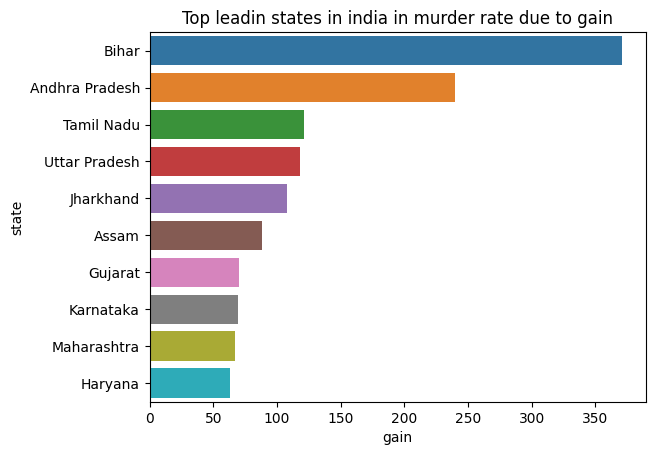

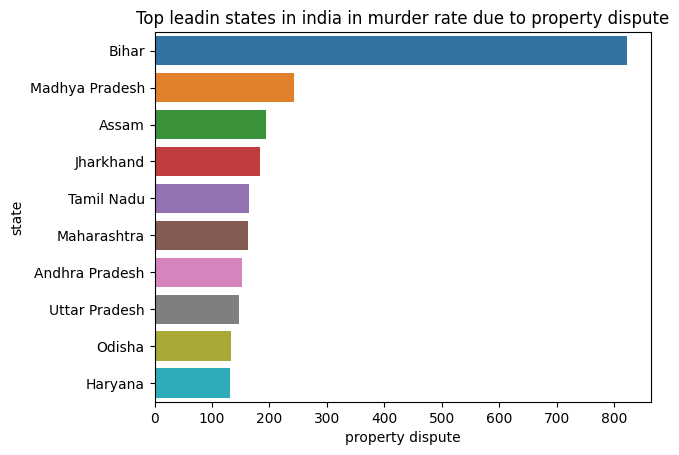

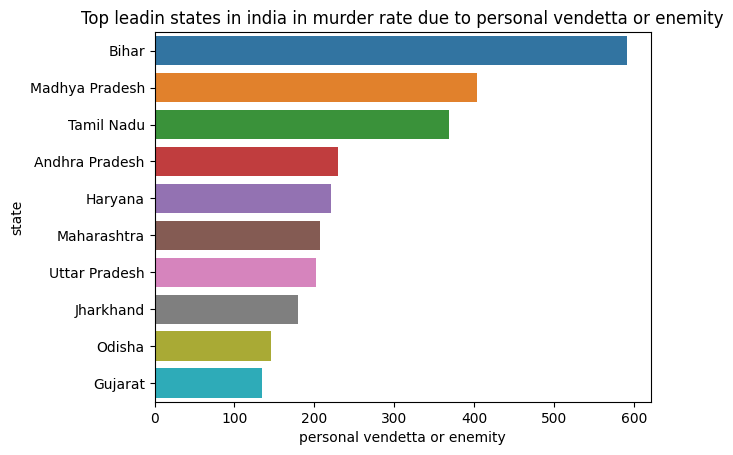

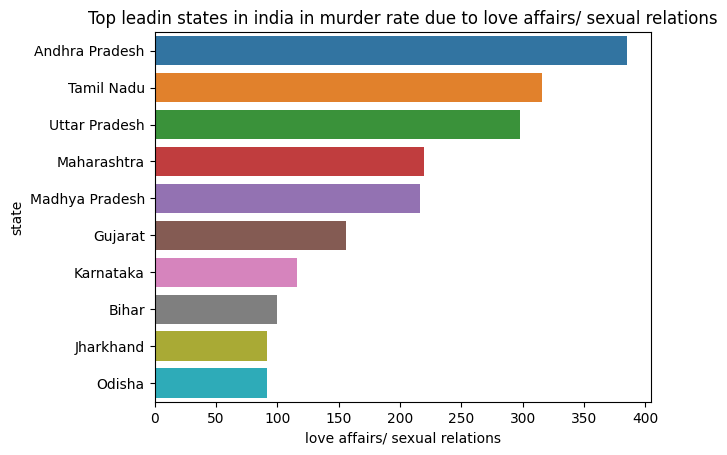

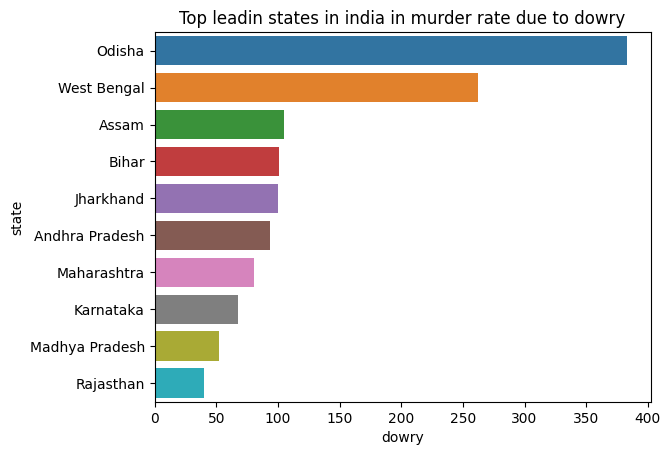

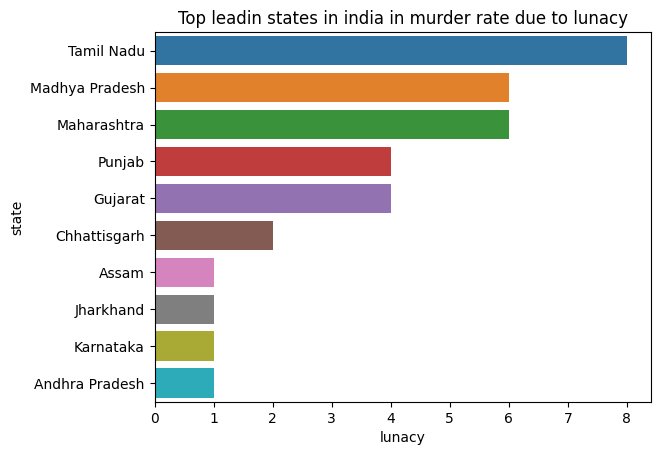

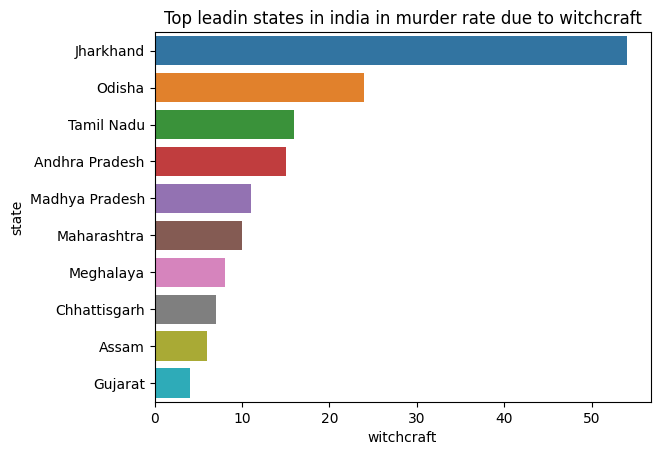

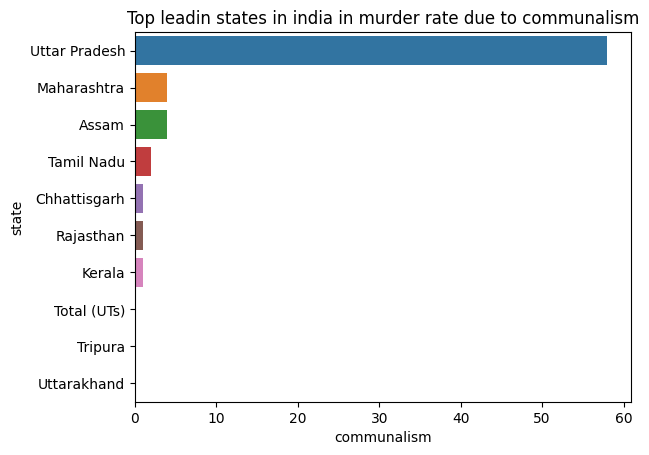

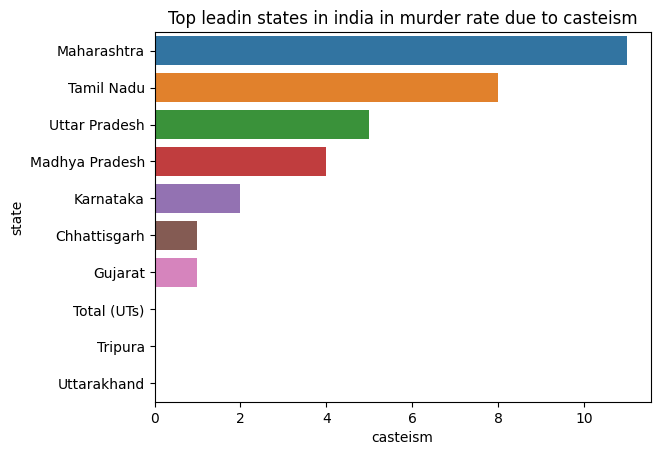

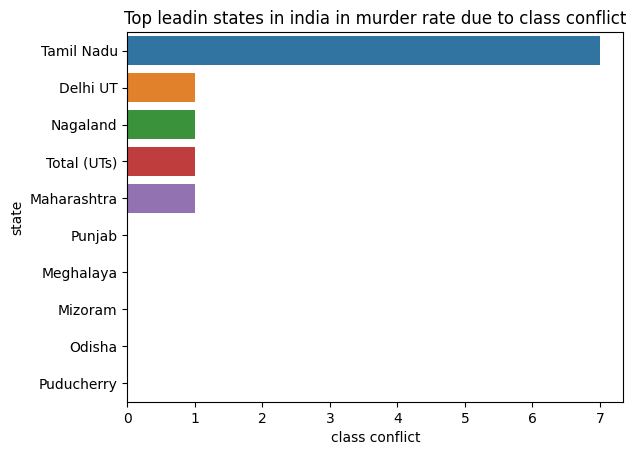

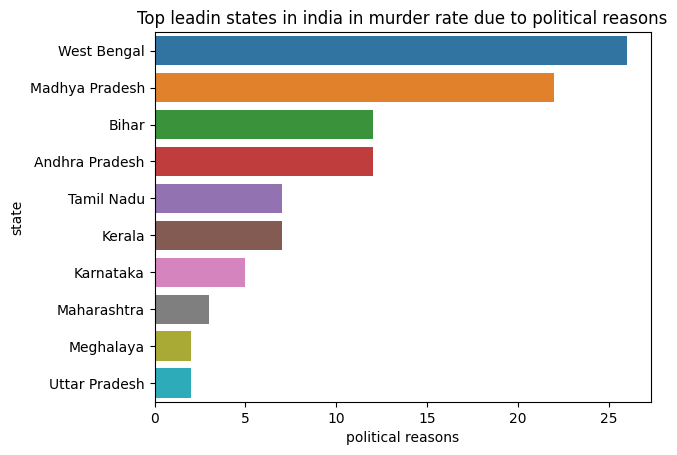

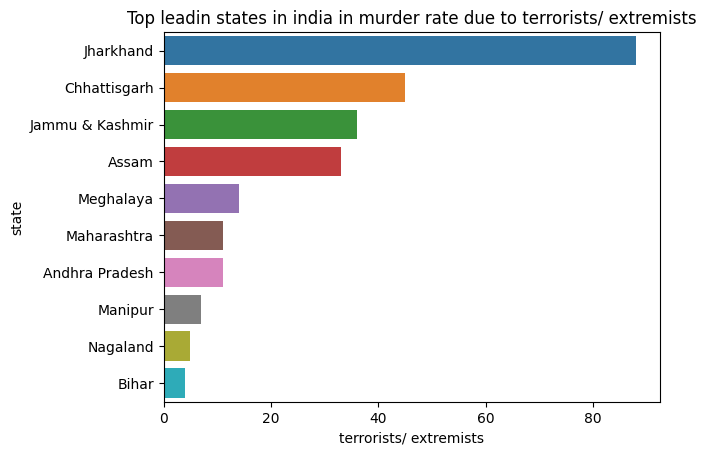

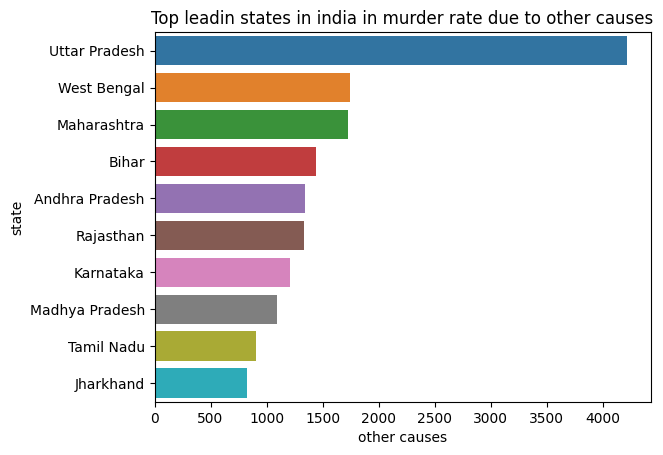

In [22]:
for m in moto:
    enimity = df.groupby(['state','year'])[m].sum().reset_index()
    filt = (enimity['year'] == 2013)
    enimity = enimity[filt]
    enimity.sort_values(by=m,ascending=False,inplace=True)
    enimity.head()
    enimity = enimity.drop_duplicates(subset="state")
    enimity = enimity[enimity['state'] != 'Total (All-India)']
    enimity = enimity[enimity['state'] != 'Total (State)']
    enimity.iloc[:10]
    title = "Top leadin states in india in murder rate due to " + str(m)
    sns.barplot(enimity[:10],x=m,y="state")
    plt.title(title)
    plt.show()

In [23]:
df.head()

,state,year,gain,property dispute,personal vendetta or enemity,love affairs/ sexual relations,dowry,lunacy,witchcraft,communalism,casteism,class conflict,political reasons,terrorists/ extremists,other causes,total
0,ANDHRA PRADESH,2001,122,159,332,355,96,7,20,1,1,2,39,120,1348,2602
1,ARUNACHAL PRADESH,2001,8,2,16,5,0,0,0,0,0,0,0,4,48,83
2,ASSAM,2001,94,125,83,37,62,1,3,0,1,25,2,111,812,1356
3,BIHAR,2001,310,888,579,178,288,4,1,0,27,6,47,22,1293,3643
4,CHHATTISGARH,2001,25,81,129,75,21,21,14,0,1,0,0,57,456,880


In [26]:
df['year'].dtype

dtype('int64')

In [25]:
df['year'] = pd.to_datetime(df['year']).dt.year

In [28]:
duplicates = df.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
489    False
490    False
491    False
492    False
493    False
Length: 494, dtype: bool
